# Downloading dataset

In [1]:
# !kaggle datasets download -d mojtaba142/hotel-booking

# Unzipping dataset

In [2]:
# import zipfile
# with zipfile.ZipFile('hotel-booking.zip', 'r') as file:
#     file.extractall('hotel-booking-dataset')

# Importing libraries

In [3]:
from IPython.display import display, HTML
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings

# Ignore future warnings

In [4]:
warnings.filterwarnings('ignore', category=FutureWarning)

# Custom function to display dataframe in notebook

In [5]:
def display_dataframe(df):
    # Check if the input is a DataFrame
    if not isinstance(df, pd.DataFrame):
        display(df)
        return
    
    # CSS to create a scrollable box
    css = '''
    <style>
        .table {
            overflow: auto;
            white-space: nowrap;
            max-height: 315px;
            width: 100%;
        }
        .table th, .table td {
            vertical-align: top;
            text-align: left;
        }
    </style>
    '''

    # DataFrame in div
    table = f"<div class='table'>{df.to_html()}</div>"

    # Display the table
    display(HTML(css + table))

# Setting display configuration pandas

In [6]:
pd.set_option('display.max_columns', None)

# Reading and Exploring data

In [7]:
df = pd.read_csv('hotel-booking-dataset/hotel_booking.csv')

In [8]:
df.shape

(119390, 36)

In [9]:
display_dataframe(df.head())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [10]:
display_dataframe(df.tail())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [11]:
display_dataframe(df.sample(5))

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
24877,Resort Hotel,0,141,2016,May,23,31,2,5,2,0.0,0,BB,IRL,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,242.0,NaN,0,Transient-Party,71.17,0,1,Check-Out,2016-06-07,Mary Rhodes,Rhodes.Mary73@mail.com,392-049-0629,************3206
37650,Resort Hotel,0,152,2017,June,24,11,4,10,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,243.0,NaN,0,Transient,68.40,0,0,Check-Out,2017-06-25,Robert Hoffman DDS,Robert_D96@yahoo.com,489-099-9660,************1183
34241,Resort Hotel,0,112,2017,March,11,15,0,3,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,477.0,0,Transient-Party,40.00,0,0,Check-Out,2017-03-18,Casey Jones,CaseyJones@protonmail.com,234-933-4229,************1128
113820,City Hotel,0,38,2017,June,24,11,1,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,168.0,NaN,0,Transient,94.00,0,1,Check-Out,2017-06-12,Carolyn Stewart,CStewart@verizon.com,264-237-6512,************7605
74040,City Hotel,1,307,2015,August,34,20,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1.0,NaN,0,Contract,62.00,0,0,Canceled,2015-01-01,Nicole Martinez,NMartinez@xfinity.com,380-811-7032,************2873


In [12]:
display_dataframe(df.describe())

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [13]:
display_dataframe(df.describe(include='object'))

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


In [14]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Cleaning data

In [16]:
df = df.drop(['name', 'email', 'phone-number', 'credit_card'], axis=1).copy()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [18]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [19]:
df['month'] = df['reservation_status_date'].dt.strftime('%Y-%m')
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
df = df.sort_values(by='month', ascending=True).copy()

# Explarotary data analysis

In [20]:
df['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64

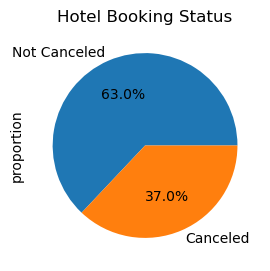

In [21]:
df['is_canceled'].value_counts(normalize=True).plot(
    kind='pie',
    labels=['Not Canceled', 'Canceled'], 
    autopct='%1.1f%%', 
    title='Hotel Booking Status',
    figsize=(7, 3)
)
plt.show()

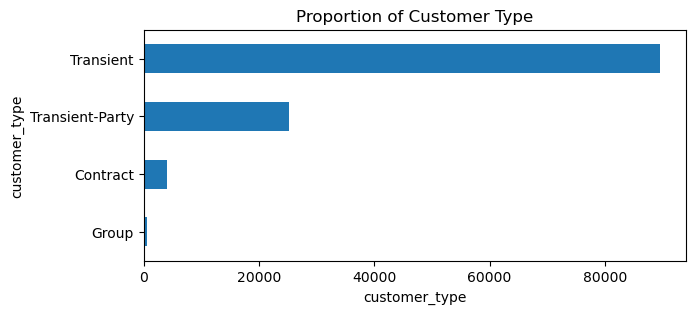

In [22]:
df['customer_type'].value_counts().sort_values(ascending=True).plot(
    kind='barh',
    xlabel='customer_type',
    title='Proportion of Customer Type',
    figsize=(7, 3)
)
plt.show()

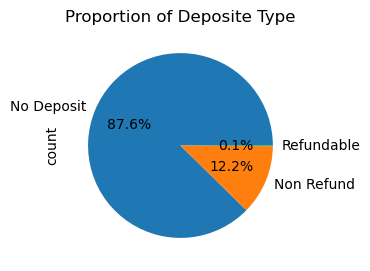

In [23]:
df['deposit_type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Proportion of Deposite Type',
    figsize=(7, 3)
)
plt.show()

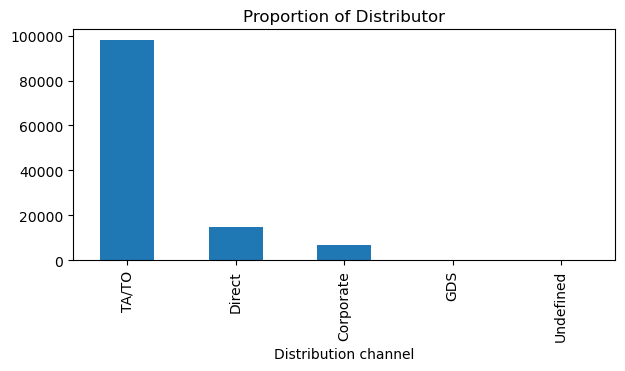

In [24]:
df['distribution_channel'].value_counts().plot(
    kind='bar',
    x='distribution_channel',
    xlabel='Distribution channel',
    title='Proportion of Distributor',
    figsize=(7, 3)
)
plt.show()

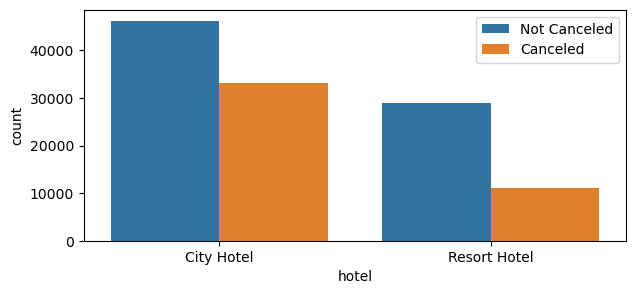

In [25]:
plt.figure(figsize=(7, 3))
sns.countplot(
    data=df,
    x='hotel',
    hue='is_canceled'
)
plt.legend(labels=['Not Canceled', 'Canceled'])
plt.show()

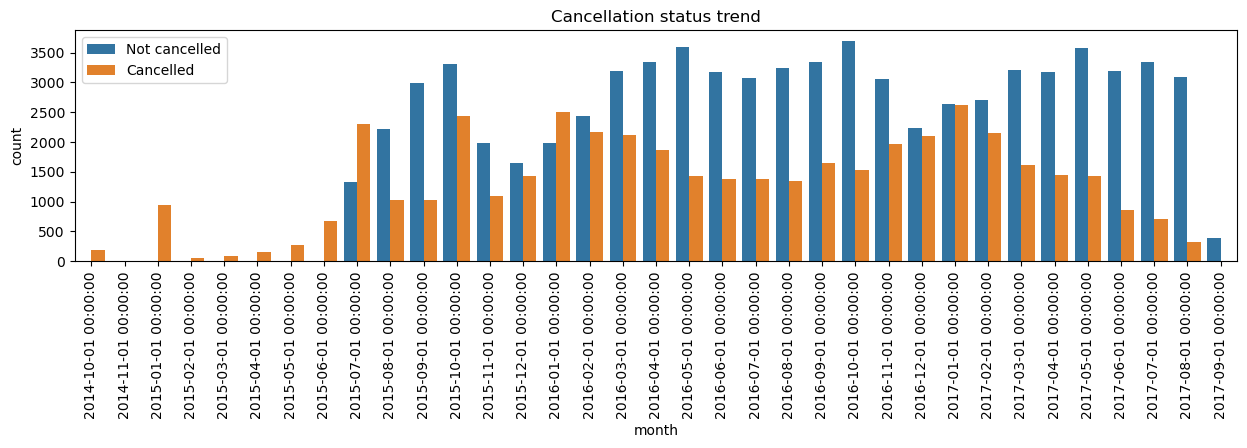

In [26]:
plt.figure(figsize=(15, 3))
sns.countplot(data=df, x='month', hue='is_canceled')
plt.title('Cancellation status trend')
plt.xticks(rotation=90)
plt.legend(labels=['Not cancelled', 'Cancelled'])
plt.show()

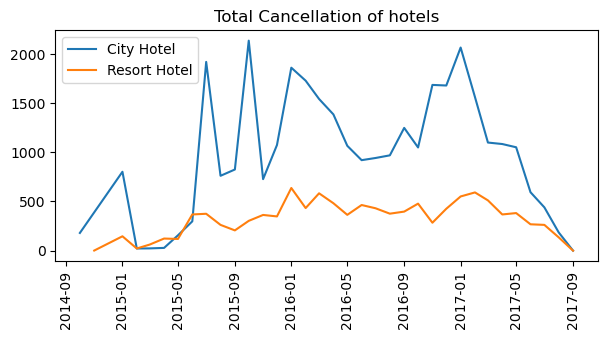

In [27]:
city_avg_adr = df.query("hotel == 'City Hotel'").groupby('month')[['is_canceled']].agg('sum')
resort_avg_adr = df.query("hotel == 'Resort Hotel'").groupby('month')[['is_canceled']].agg('sum')

plt.figure(figsize=(7, 3))
plt.plot(city_avg_adr.index, city_avg_adr['is_canceled'], label='City Hotel')
plt.plot(resort_avg_adr.index, resort_avg_adr['is_canceled'], label='Resort Hotel')
plt.legend()
plt.xticks(rotation=90)
plt.title('Total Cancellation of hotels')
plt.show()

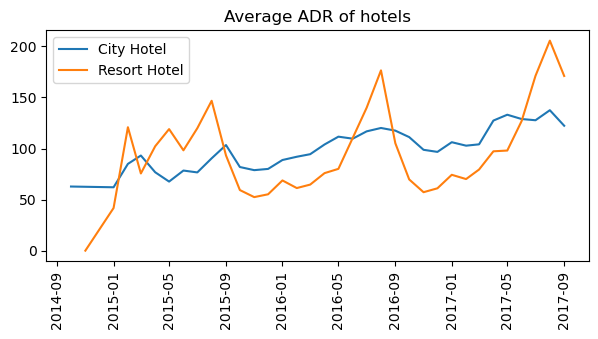

In [28]:
city_avg_adr = df.query("hotel == 'City Hotel'").groupby('month')[['adr']].agg('mean')
resort_avg_adr = df.query("hotel == 'Resort Hotel'").groupby('month')[['adr']].agg('mean')

plt.figure(figsize=(7, 3))
plt.plot(city_avg_adr.index, city_avg_adr['adr'], label='City Hotel')
plt.plot(resort_avg_adr.index, resort_avg_adr['adr'], label='Resort Hotel')
plt.legend()
plt.xticks(rotation=90)
plt.title('Average ADR of hotels')
plt.show()

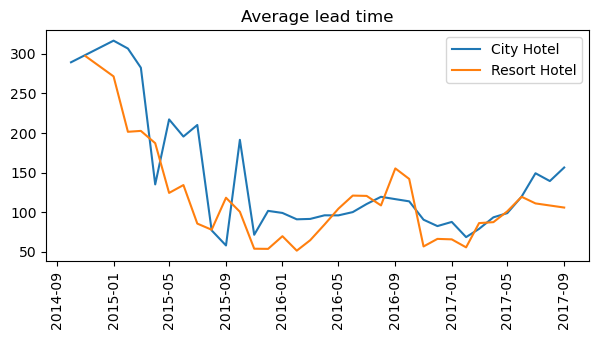

In [29]:
city_avg_lead = df.query("hotel == 'City Hotel'").groupby('month')[['lead_time']].agg('mean')
resort_avg_lead =  df.query("hotel == 'Resort Hotel'").groupby('month')[['lead_time']].agg('mean')

plt.figure(figsize=(7, 3))
plt.plot(city_avg_lead.index, city_avg_lead['lead_time'], label='City Hotel')
plt.plot(resort_avg_lead.index, resort_avg_lead['lead_time'], label='Resort Hotel')
plt.title('Average lead time')
plt.xticks(rotation=90)
plt.legend()
plt.show()